In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [4]:
world_path = 'gray_world'

In [5]:
world_np = np.load(os.path.join(world_path, '68.npy'))
world_img = Image.fromarray(world_np)

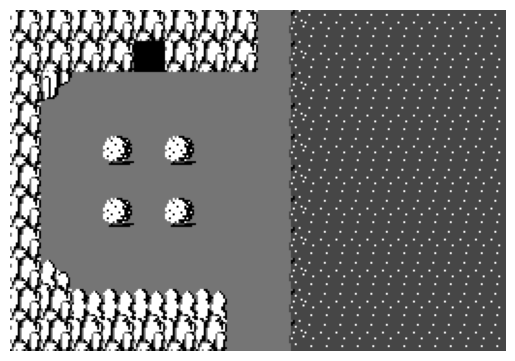

In [5]:
# Plot the image using matplotlib
plt.imshow(world_img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

In [6]:
world_np.shape

(176, 256)

In [7]:
# Get the dimensions of the image
height, width = world_np.shape

# Define the size of each tile
tile_size = 16

# Calculate the number of tiles along width and height
num_tiles_w = width // tile_size
num_tiles_h = height // tile_size

In [8]:
# Create a list to store the tiles
map_tiles = []

# Loop through the image and extract tiles
for i in range(num_tiles_h):
    for j in range(num_tiles_w):
        tile = world_np[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
        map_tiles.append(tile)

In [9]:
map_tiles[0].shape

(16, 16)

In [10]:
tile_set_path = 'gray_tile'
tile_set = []
for filename in os.listdir(tile_set_path):
    tile = np.load(os.path.join(tile_set_path, filename))
    tile_set.append(tile)

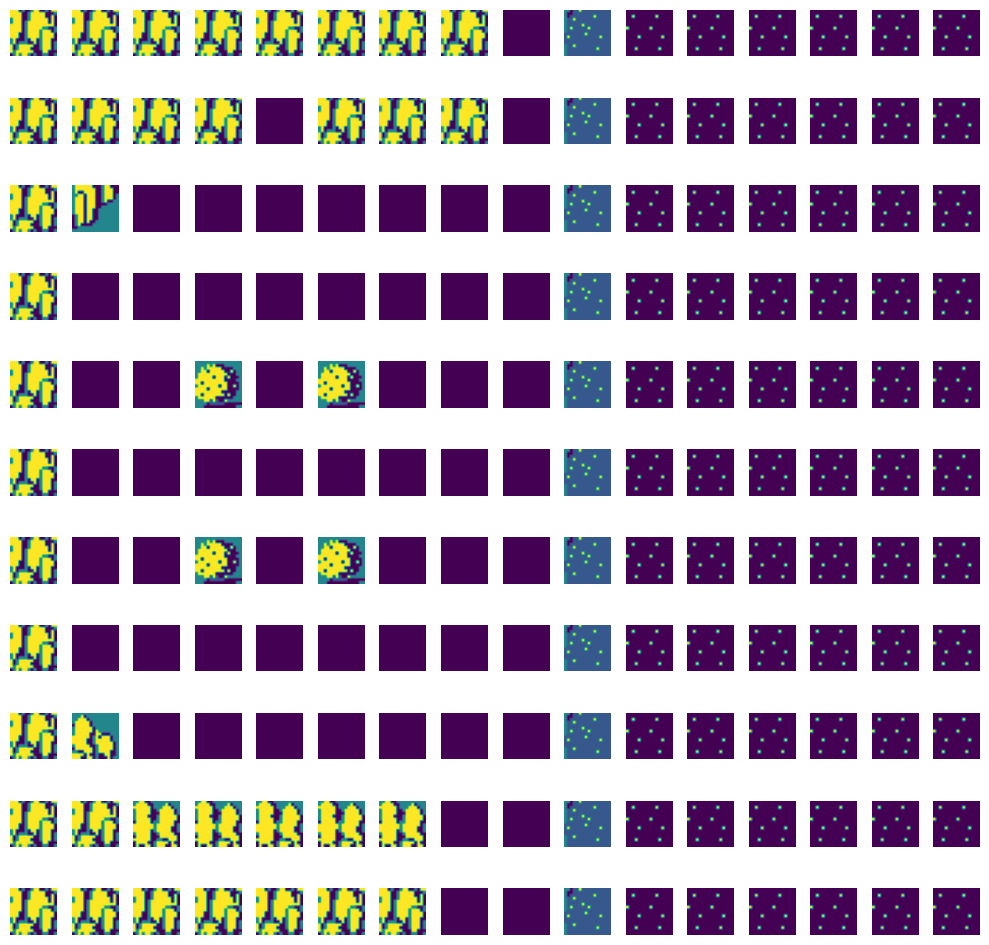

176


In [66]:
matches = []

for mt in map_tiles:
    for tile in tile_set:
        if np.array_equal(mt, tile):
            matches.append(tile)
            
# Plot the tiles using matplotlib
fig, axes = plt.subplots(num_tiles_h, num_tiles_w, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(matches[i])
    ax.axis('off')  # Hide the axes
    
plt.tight_layout()
plt.show()

print(len(matches)) # deve essere 11x16 = 176

In [11]:
tile_set_path = 'gray_tile'
tile_set = []
for filename in os.listdir(tile_set_path):
    tile = np.load(os.path.join(tile_set_path, filename))
    tile_set.append(tile)

In [14]:
world_path = 'gray_world'

for filename in os.listdir(world_path):
    count = 0
    chunk = np.load(os.path.join(world_path, filename))
    # Loop through the image and extract tiles
    map_tiles = []
    for i in range(num_tiles_h):
        for j in range(num_tiles_w):
            chunk_tile = chunk[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            for tile in tile_set:
                if np.array_equal(chunk_tile, tile):
                    count += 1
    if count != 176:
        print(filename)
        break

In [ ]:
world_path = 'gray_world'

for filename in os.listdir(world_path):
    count = 0
    chunk = np.load(os.path.join(world_path, filename))
    # Loop through the image and extract tiles
    map_tiles = []
    for i in range(num_tiles_h):
        for j in range(num_tiles_w):
            chunk_tile = chunk[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            for tile in tile_set:
                if np.array_equal(chunk_tile, tile):
                    count += 1
    if count != 176:
        print(filename)
        break

In [16]:
world_path = 'gray_world'
output_folder = 'map_arrays'
tile_types = len(tile_set)

for filename in os.listdir(world_path):
    chunk = np.load(os.path.join(world_path, filename))
    embeddings = np.zeros((num_tiles_h, num_tiles_w, tile_types), dtype=int)
    for i in range(num_tiles_h):
        for j in range(num_tiles_w):
            chunk_tile = chunk[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            for tile_index, tile in enumerate(tile_set):
                if np.array_equal(chunk_tile, tile):
                    embeddings[i, j, tile_index] = 1
                    break
    # Save the tile types array for the current world map
    output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.npy")
    np.save(output_path, embeddings)

    # If you want to print the tile types for verification
    print(f"{filename} tile types:\n{output_path}")

0.npy tile types:
map_arrays/0.npy
1.npy tile types:
map_arrays/1.npy
2.npy tile types:
map_arrays/2.npy
3.npy tile types:
map_arrays/3.npy
4.npy tile types:
map_arrays/4.npy
5.npy tile types:
map_arrays/5.npy
6.npy tile types:
map_arrays/6.npy
7.npy tile types:
map_arrays/7.npy
8.npy tile types:
map_arrays/8.npy
9.npy tile types:
map_arrays/9.npy
10.npy tile types:
map_arrays/10.npy
11.npy tile types:
map_arrays/11.npy
12.npy tile types:
map_arrays/12.npy
13.npy tile types:
map_arrays/13.npy
14.npy tile types:
map_arrays/14.npy
15.npy tile types:
map_arrays/15.npy
16.npy tile types:
map_arrays/16.npy
17.npy tile types:
map_arrays/17.npy
18.npy tile types:
map_arrays/18.npy
19.npy tile types:
map_arrays/19.npy
20.npy tile types:
map_arrays/20.npy
21.npy tile types:
map_arrays/21.npy
22.npy tile types:
map_arrays/22.npy
23.npy tile types:
map_arrays/23.npy
24.npy tile types:
map_arrays/24.npy
25.npy tile types:
map_arrays/25.npy
26.npy tile types:
map_arrays/26.npy
27.npy tile types:
ma

In [12]:
def convert_embedding_to_image(embedding, tile_set, tile_size):
    num_tiles_h, num_tiles_w, _ = embedding.shape
    # Initialize the image with the appropriate dimensions
    reconstructed_image = np.zeros((num_tiles_h * tile_size, num_tiles_w * tile_size), dtype=tile_set[0].dtype)
    
    # Loop through each position in the embedding array
    for i in range(num_tiles_h):
        for j in range(num_tiles_w):
            # Find the index of the tile (one-hot encoding)
            tile_index = np.argmax(embedding[i, j])
            # Retrieve the tile from the tile set
            tile = tile_set[tile_index]
            # Place the tile in the correct position in the reconstructed image
            reconstructed_image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size] = tile

    return reconstructed_image

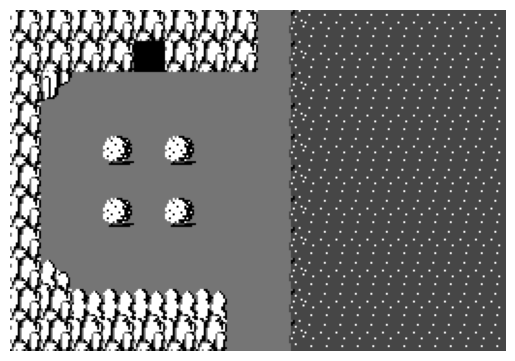

(11, 16, 42)


In [14]:
test_np = np.load('map_arrays/68.npy')
test = convert_embedding_to_image(test_np, tile_set, tile_size)
test_img = Image.fromarray(test)
plt.imshow(test_img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()
print(test_np.shape)